<a href="https://colab.research.google.com/github/kuds/rl-lunar-lander/blob/main/%5BLunar%20Lander%5D%20Soft%20Actor-Critic%20(SAC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Soft Actor-Critic (SAC)
---
In this notebook, you will implement a DQN agent with OpenAI Gym's LunarLander-v2 environment.

### 1. Import the Necessary Packages

In [ ]:
!pip install swig

In [ ]:
!pip install gymnasium gymnasium[box2d] stable_baselines3

In [ ]:
import gymnasium
import stable_baselines3
from stable_baselines3 import SAC
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.vec_env import VecFrameStack, VecTransposeImage
from stable_baselines3.common.vec_env import VecVideoRecorder

import os
import torch
import torch.backends.quantized
import numpy
import scipy
import platform
import IPython
import matplotlib
import matplotlib.pyplot

In [ ]:
print("Python Version: {}".format(platform.python_version()))
print("Is Cuda Available: {}".format(torch.cuda.is_available()))
print("Torch Version: {}".format(torch.__version__))
print("Cuda Version: {}".format(torch.version.cuda))
print("Scipy Version: {}".format(scipy.__version__))
print("Numpy Version: {}".format(numpy.__version__))
print("Stable Baseline Version: {}".format(stable_baselines3.__version__))
print("IPython Version: {}".format(IPython.__version__))
print("Gymnasium Version: {}".format(gymnasium.__version__))

Python Version: 3.10.12
Is Cuda Available: True
Torch Version: 2.3.1+cu121
Cuda Version: 12.1
Scipy Version: 1.13.1
Numpy Version: 1.26.4
Stable Baseline Version: 2.3.2
IPython Version: 7.34.0
Gymnasium Version: 0.29.1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
backend = torch.backends.quantized.engine
print(f"Currently using backend: {backend}"

In [ ]:
env = gymnasium.make('LunarLanderContinuous-v2')
print("Observation Space Size: ", env.observation_space.shape)
print("Action Space Size: ", env.action_space.shape)
env.close()

Observation Space Size:  (8,)
Action Space Size:  (2,)


In [ ]:
env_str = "LunarLanderContinuous-v2"
log_dir = "./logs/{}".format(env_str)

In [ ]:
#Create Training Environment
env = make_vec_env(env_str, n_envs=1)

#Create Evaluation Environment
env_val = make_vec_env(env_str, n_envs=1)

eval_callback = EvalCallback(env_val,
                             best_model_save_path="./logs/",
                             log_path="./logs/",
                             eval_freq=10000,
                             render=False,
                             n_eval_episodes=20)

# Initialize SAC
model = SAC('MlpPolicy', env, verbose=0)

# Train the model
model.learn(total_timesteps=300000,
            progress_bar=True,
            callback=eval_callback)

# Save the model
model.save(os.path.join(log_dir, "sac_lunar_lander"))

# Evaluate the model
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=20)
print(f"Mean reward: {mean_reward:.2f} +/- {std_reward:.2f}")

env.close()
env_val.close()

Output()

Eval num_timesteps=1000, episode_reward=-148.22 +/- 44.81

Episode length: 141.40 +/- 43.89

New best mean reward!

Eval num_timesteps=2000, episode_reward=-174.27 +/- 74.59

Episode length: 420.70 +/- 134.07

Eval num_timesteps=3000, episode_reward=-219.37 +/- 23.54

Episode length: 488.40 +/- 83.26

Eval num_timesteps=4000, episode_reward=-195.09 +/- 70.87

Episode length: 491.20 +/- 218.88

Eval num_timesteps=5000, episode_reward=-110.75 +/- 81.01

Episode length: 820.60 +/- 232.72

New best mean reward!

Eval num_timesteps=6000, episode_reward=-50.50 +/- 91.32

Episode length: 974.50 +/- 76.50

New best mean reward!

Eval num_timesteps=7000, episode_reward=-33.36 +/- 30.89

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=8000, episode_reward=-50.68 +/- 118.35

Episode length: 748.30 +/- 221.97

Eval num_timesteps=9000, episode_reward=-80.00 +/- 20.92

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=10000, episode_reward=-10.43 +/- 19.64

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=11000, episode_reward=-2.24 +/- 180.69

Episode length: 942.20 +/- 102.54

New best mean reward!

Eval num_timesteps=12000, episode_reward=-59.37 +/- 30.93

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=13000, episode_reward=-89.24 +/- 23.79

Episode length: 911.50 +/- 265.50

Eval num_timesteps=14000, episode_reward=-44.97 +/- 43.65

Episode length: 909.00 +/- 273.00

Eval num_timesteps=15000, episode_reward=-52.00 +/- 36.53

Episode length: 910.20 +/- 269.40

Eval num_timesteps=16000, episode_reward=-42.79 +/- 77.53

Episode length: 803.00 +/- 359.05

Eval num_timesteps=17000, episode_reward=-51.97 +/- 38.75

Episode length: 908.50 +/- 274.50

Eval num_timesteps=18000, episode_reward=-55.20 +/- 60.38

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=19000, episode_reward=-81.51 +/- 46.13

Episode length: 740.90 +/- 396.66

Eval num_timesteps=20000, episode_reward=-124.78 +/- 88.33

Episode length: 474.90 +/- 429.24

Eval num_timesteps=21000, episode_reward=-154.88 +/- 84.58

Episode length: 556.30 +/- 443.84

Eval num_timesteps=22000, episode_reward=-118.53 +/- 94.61

Episode length: 643.80 +/- 436.51

Eval num_timesteps=23000, episode_reward=-30.70 +/- 141.70

Episode length: 603.90 +/- 413.84

Eval num_timesteps=24000, episode_reward=0.16 +/- 126.47

Episode length: 603.80 +/- 339.02

New best mean reward!

Eval num_timesteps=25000, episode_reward=-76.72 +/- 237.45

Episode length: 545.20 +/- 341.49

Eval num_timesteps=26000, episode_reward=-60.76 +/- 148.75

Episode length: 749.30 +/- 312.79

Eval num_timesteps=27000, episode_reward=-101.69 +/- 268.80

Episode length: 525.10 +/- 367.14

Eval num_timesteps=28000, episode_reward=-68.81 +/- 80.58

Episode length: 306.80 +/- 343.03

Eval num_timesteps=29000, episode_reward=-95.08 +/- 73.65

Episode length: 86.30 +/- 24.71

Eval num_timesteps=30000, episode_reward=-39.10 +/- 130.80

Episode length: 378.70 +/- 374.79

Eval num_timesteps=31000, episode_reward=-74.56 +/- 79.25

Episode length: 659.00 +/- 376.69

Eval num_timesteps=32000, episode_reward=10.70 +/- 57.19

Episode length: 336.90 +/- 377.83

New best mean reward!

Eval num_timesteps=33000, episode_reward=-17.86 +/- 27.51

Episode length: 552.30 +/- 447.83

Eval num_timesteps=34000, episode_reward=-26.83 +/- 25.65

Episode length: 739.20 +/- 399.30

Eval num_timesteps=35000, episode_reward=-9.87 +/- 18.31

Episode length: 291.10 +/- 357.19

Eval num_timesteps=36000, episode_reward=-7.62 +/- 23.61

Episode length: 636.50 +/- 445.21

Eval num_timesteps=37000, episode_reward=-12.66 +/- 26.36

Episode length: 819.60 +/- 360.82

Eval num_timesteps=38000, episode_reward=-19.31 +/- 27.29

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=39000, episode_reward=-27.22 +/- 44.62

Episode length: 927.00 +/- 219.00

Eval num_timesteps=40000, episode_reward=-21.18 +/- 53.39

Episode length: 910.90 +/- 267.30

Eval num_timesteps=41000, episode_reward=-0.57 +/- 13.50

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=42000, episode_reward=-23.63 +/- 84.96

Episode length: 965.30 +/- 104.10

Eval num_timesteps=43000, episode_reward=-18.56 +/- 24.30

Episode length: 826.00 +/- 348.03

Eval num_timesteps=44000, episode_reward=-220.18 +/- 402.02

Episode length: 913.40 +/- 180.30

Eval num_timesteps=45000, episode_reward=-116.54 +/- 252.11

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=46000, episode_reward=-87.48 +/- 52.46

Episode length: 617.20 +/- 380.68

Eval num_timesteps=47000, episode_reward=-160.09 +/- 229.72

Episode length: 602.10 +/- 372.87

Eval num_timesteps=48000, episode_reward=-84.39 +/- 89.70

Episode length: 468.80 +/- 369.80

Eval num_timesteps=49000, episode_reward=-230.02 +/- 163.83

Episode length: 205.30 +/- 151.78

Eval num_timesteps=50000, episode_reward=-55.13 +/- 82.33

Episode length: 282.50 +/- 275.73

Eval num_timesteps=51000, episode_reward=-20.17 +/- 80.53

Episode length: 441.20 +/- 372.08

Eval num_timesteps=52000, episode_reward=-80.04 +/- 138.01

Episode length: 517.60 +/- 400.94

Eval num_timesteps=53000, episode_reward=62.19 +/- 84.81

Episode length: 738.60 +/- 322.31

New best mean reward!

Eval num_timesteps=54000, episode_reward=-46.90 +/- 173.28

Episode length: 729.60 +/- 413.07

Eval num_timesteps=55000, episode_reward=43.97 +/- 77.85

Episode length: 830.40 +/- 339.88

Eval num_timesteps=56000, episode_reward=-25.98 +/- 110.19

Episode length: 665.20 +/- 413.32

Eval num_timesteps=57000, episode_reward=53.73 +/- 74.65

Episode length: 805.50 +/- 315.76

Eval num_timesteps=58000, episode_reward=107.79 +/- 87.36

Episode length: 698.40 +/- 343.41

New best mean reward!

Eval num_timesteps=59000, episode_reward=21.25 +/- 41.83

Episode length: 809.80 +/- 335.16

Eval num_timesteps=60000, episode_reward=1.10 +/- 58.05

Episode length: 838.40 +/- 294.15

Eval num_timesteps=61000, episode_reward=128.23 +/- 108.29

Episode length: 508.20 +/- 348.76

New best mean reward!

Eval num_timesteps=62000, episode_reward=125.24 +/- 121.97

Episode length: 527.80 +/- 275.39

Eval num_timesteps=63000, episode_reward=124.21 +/- 137.95

Episode length: 289.20 +/- 242.93

Eval num_timesteps=64000, episode_reward=196.90 +/- 155.61

Episode length: 290.90 +/- 55.40

New best mean reward!

Eval num_timesteps=65000, episode_reward=229.38 +/- 26.42

Episode length: 377.40 +/- 116.80

New best mean reward!

Eval num_timesteps=66000, episode_reward=242.08 +/- 42.31

Episode length: 420.40 +/- 194.16

New best mean reward!

Eval num_timesteps=67000, episode_reward=215.50 +/- 52.19

Episode length: 395.50 +/- 171.01

Eval num_timesteps=68000, episode_reward=207.38 +/- 47.45

Episode length: 412.90 +/- 210.26

Eval num_timesteps=69000, episode_reward=240.94 +/- 16.87

Episode length: 354.80 +/- 79.58

Eval num_timesteps=70000, episode_reward=121.67 +/- 150.03

Episode length: 348.50 +/- 108.92

Eval num_timesteps=71000, episode_reward=129.02 +/- 156.22

Episode length: 364.40 +/- 121.50

Eval num_timesteps=72000, episode_reward=164.22 +/- 107.42

Episode length: 414.20 +/- 108.53

Eval num_timesteps=73000, episode_reward=225.35 +/- 39.09

Episode length: 355.80 +/- 126.60

Eval num_timesteps=74000, episode_reward=232.93 +/- 34.63

Episode length: 428.60 +/- 86.55

Eval num_timesteps=75000, episode_reward=238.36 +/- 24.51

Episode length: 393.40 +/- 90.67

Eval num_timesteps=76000, episode_reward=239.87 +/- 22.88

Episode length: 379.30 +/- 87.92

Eval num_timesteps=77000, episode_reward=252.96 +/- 15.06

Episode length: 401.20 +/- 90.25

New best mean reward!

Eval num_timesteps=78000, episode_reward=227.12 +/- 75.98

Episode length: 359.80 +/- 115.47

Eval num_timesteps=79000, episode_reward=247.58 +/- 28.85

Episode length: 388.70 +/- 106.96

Eval num_timesteps=80000, episode_reward=233.93 +/- 27.76

Episode length: 376.90 +/- 110.52

Eval num_timesteps=81000, episode_reward=194.00 +/- 111.63

Episode length: 423.10 +/- 109.83

Eval num_timesteps=82000, episode_reward=250.62 +/- 23.00

Episode length: 389.80 +/- 103.06

Eval num_timesteps=83000, episode_reward=239.44 +/- 23.34

Episode length: 376.50 +/- 61.02

Eval num_timesteps=84000, episode_reward=182.13 +/- 141.19

Episode length: 421.60 +/- 115.11

Eval num_timesteps=85000, episode_reward=243.12 +/- 29.95

Episode length: 315.60 +/- 70.84

Eval num_timesteps=86000, episode_reward=230.32 +/- 23.56

Episode length: 441.40 +/- 178.29

Eval num_timesteps=87000, episode_reward=221.73 +/- 30.73

Episode length: 432.20 +/- 135.81

Eval num_timesteps=88000, episode_reward=208.94 +/- 83.69

Episode length: 328.90 +/- 93.62

Eval num_timesteps=89000, episode_reward=244.74 +/- 27.00

Episode length: 352.00 +/- 58.85

Eval num_timesteps=90000, episode_reward=250.48 +/- 19.17

Episode length: 343.20 +/- 141.52

Eval num_timesteps=91000, episode_reward=253.19 +/- 23.72

Episode length: 342.60 +/- 74.55

New best mean reward!

Eval num_timesteps=92000, episode_reward=242.12 +/- 24.71

Episode length: 307.90 +/- 34.98

Eval num_timesteps=93000, episode_reward=255.01 +/- 26.73

Episode length: 301.50 +/- 31.38

New best mean reward!

Eval num_timesteps=94000, episode_reward=254.47 +/- 13.09

Episode length: 347.60 +/- 62.40

Eval num_timesteps=95000, episode_reward=219.49 +/- 61.93

Episode length: 423.10 +/- 195.63

Eval num_timesteps=96000, episode_reward=216.37 +/- 119.47

Episode length: 318.60 +/- 79.79

Eval num_timesteps=97000, episode_reward=235.43 +/- 72.22

Episode length: 397.40 +/- 223.40

Eval num_timesteps=98000, episode_reward=257.19 +/- 19.43

Episode length: 298.40 +/- 65.81

New best mean reward!

Eval num_timesteps=99000, episode_reward=249.34 +/- 19.93

Episode length: 341.40 +/- 62.00

Eval num_timesteps=100000, episode_reward=259.16 +/- 21.12

Episode length: 271.90 +/- 51.89

New best mean reward!

Eval num_timesteps=101000, episode_reward=202.02 +/- 84.15

Episode length: 362.00 +/- 199.05

Eval num_timesteps=102000, episode_reward=242.34 +/- 31.93

Episode length: 404.60 +/- 143.71

Eval num_timesteps=103000, episode_reward=252.41 +/- 18.08

Episode length: 275.20 +/- 81.26

Eval num_timesteps=104000, episode_reward=248.68 +/- 19.41

Episode length: 333.10 +/- 104.41

Eval num_timesteps=105000, episode_reward=260.55 +/- 19.77

Episode length: 272.30 +/- 69.89

New best mean reward!

Eval num_timesteps=106000, episode_reward=235.55 +/- 44.74

Episode length: 327.20 +/- 111.63

Eval num_timesteps=107000, episode_reward=200.62 +/- 95.99

Episode length: 252.40 +/- 94.85

Eval num_timesteps=108000, episode_reward=227.97 +/- 75.63

Episode length: 251.70 +/- 69.69

Eval num_timesteps=109000, episode_reward=235.41 +/- 41.29

Episode length: 364.70 +/- 104.41

Eval num_timesteps=110000, episode_reward=233.81 +/- 34.90

Episode length: 355.50 +/- 159.66

Eval num_timesteps=111000, episode_reward=223.81 +/- 81.93

Episode length: 307.60 +/- 146.11

Eval num_timesteps=112000, episode_reward=227.66 +/- 66.02

Episode length: 364.60 +/- 248.55

Eval num_timesteps=113000, episode_reward=238.79 +/- 35.60

Episode length: 269.90 +/- 119.19

Eval num_timesteps=114000, episode_reward=226.59 +/- 77.33

Episode length: 253.70 +/- 192.99

Eval num_timesteps=115000, episode_reward=188.98 +/- 97.98

Episode length: 482.20 +/- 283.95

Eval num_timesteps=116000, episode_reward=200.93 +/- 98.04

Episode length: 343.30 +/- 232.17

Eval num_timesteps=117000, episode_reward=181.54 +/- 123.21

Episode length: 329.30 +/- 120.46

Eval num_timesteps=118000, episode_reward=191.97 +/- 139.98

Episode length: 409.40 +/- 240.46

Eval num_timesteps=119000, episode_reward=230.36 +/- 26.72

Episode length: 365.80 +/- 136.78

Eval num_timesteps=120000, episode_reward=219.54 +/- 62.61

Episode length: 360.70 +/- 166.90

Eval num_timesteps=121000, episode_reward=261.58 +/- 11.21

Episode length: 318.00 +/- 72.62

New best mean reward!

Eval num_timesteps=122000, episode_reward=248.57 +/- 50.99

Episode length: 372.80 +/- 138.35

Eval num_timesteps=123000, episode_reward=235.98 +/- 36.23

Episode length: 300.90 +/- 83.83

Eval num_timesteps=124000, episode_reward=234.33 +/- 67.67

Episode length: 361.90 +/- 216.82

Eval num_timesteps=125000, episode_reward=214.62 +/- 92.58

Episode length: 365.30 +/- 150.43

Eval num_timesteps=126000, episode_reward=227.71 +/- 51.35

Episode length: 327.00 +/- 108.04

Eval num_timesteps=127000, episode_reward=245.93 +/- 16.31

Episode length: 333.00 +/- 49.99

Eval num_timesteps=128000, episode_reward=218.28 +/- 97.14

Episode length: 323.50 +/- 69.84

Eval num_timesteps=129000, episode_reward=194.43 +/- 114.88

Episode length: 398.40 +/- 141.90

Eval num_timesteps=130000, episode_reward=251.25 +/- 27.92

Episode length: 333.10 +/- 76.94

Eval num_timesteps=131000, episode_reward=264.75 +/- 19.18

Episode length: 304.20 +/- 64.34

New best mean reward!

Eval num_timesteps=132000, episode_reward=256.63 +/- 14.63

Episode length: 268.80 +/- 20.88

Eval num_timesteps=133000, episode_reward=207.16 +/- 111.43

Episode length: 395.40 +/- 165.54

Eval num_timesteps=134000, episode_reward=185.80 +/- 118.57

Episode length: 376.90 +/- 191.50

Eval num_timesteps=135000, episode_reward=245.22 +/- 9.86

Episode length: 323.40 +/- 42.21

Eval num_timesteps=136000, episode_reward=177.87 +/- 86.52

Episode length: 421.40 +/- 219.30

Eval num_timesteps=137000, episode_reward=251.08 +/- 20.01

Episode length: 270.20 +/- 57.08

Eval num_timesteps=138000, episode_reward=257.27 +/- 18.28

Episode length: 326.30 +/- 66.70

Eval num_timesteps=139000, episode_reward=245.39 +/- 47.08

Episode length: 387.40 +/- 145.27

Eval num_timesteps=140000, episode_reward=153.70 +/- 110.99

Episode length: 454.20 +/- 161.77

Eval num_timesteps=141000, episode_reward=246.20 +/- 39.79

Episode length: 386.40 +/- 196.58

Eval num_timesteps=142000, episode_reward=267.24 +/- 17.46

Episode length: 318.10 +/- 60.84

New best mean reward!

Eval num_timesteps=143000, episode_reward=254.97 +/- 22.26

Episode length: 277.20 +/- 62.56

Eval num_timesteps=144000, episode_reward=257.40 +/- 25.67

Episode length: 277.50 +/- 67.94

Eval num_timesteps=145000, episode_reward=261.41 +/- 20.17

Episode length: 283.90 +/- 54.27

Eval num_timesteps=146000, episode_reward=227.24 +/- 91.59

Episode length: 292.50 +/- 51.07

Eval num_timesteps=147000, episode_reward=247.10 +/- 32.42

Episode length: 305.20 +/- 84.03

Eval num_timesteps=148000, episode_reward=264.95 +/- 20.74

Episode length: 272.40 +/- 54.60

Eval num_timesteps=149000, episode_reward=234.27 +/- 84.51

Episode length: 370.50 +/- 225.23

Eval num_timesteps=150000, episode_reward=259.81 +/- 24.47

Episode length: 258.20 +/- 98.82

Eval num_timesteps=151000, episode_reward=262.03 +/- 21.90

Episode length: 273.50 +/- 30.16

Eval num_timesteps=152000, episode_reward=261.42 +/- 19.53

Episode length: 249.70 +/- 35.84

Eval num_timesteps=153000, episode_reward=271.50 +/- 18.79

Episode length: 255.60 +/- 51.07

New best mean reward!

Eval num_timesteps=154000, episode_reward=268.10 +/- 15.76

Episode length: 284.10 +/- 70.35

Eval num_timesteps=155000, episode_reward=266.32 +/- 22.83

Episode length: 282.00 +/- 26.70

Eval num_timesteps=156000, episode_reward=257.59 +/- 28.67

Episode length: 297.60 +/- 33.47

Eval num_timesteps=157000, episode_reward=274.61 +/- 21.15

Episode length: 256.50 +/- 38.27

New best mean reward!

Eval num_timesteps=158000, episode_reward=240.44 +/- 75.74

Episode length: 260.40 +/- 47.62

Eval num_timesteps=159000, episode_reward=259.55 +/- 20.87

Episode length: 302.20 +/- 64.48

Eval num_timesteps=160000, episode_reward=249.43 +/- 42.15

Episode length: 323.80 +/- 131.12

Eval num_timesteps=161000, episode_reward=261.11 +/- 27.22

Episode length: 320.50 +/- 140.79

Eval num_timesteps=162000, episode_reward=212.67 +/- 134.93

Episode length: 328.50 +/- 130.87

Eval num_timesteps=163000, episode_reward=246.92 +/- 36.94

Episode length: 345.80 +/- 173.37

Eval num_timesteps=164000, episode_reward=234.07 +/- 78.85

Episode length: 272.90 +/- 134.68

Eval num_timesteps=165000, episode_reward=264.66 +/- 29.01

Episode length: 298.60 +/- 48.27

Eval num_timesteps=166000, episode_reward=253.55 +/- 19.52

Episode length: 241.00 +/- 68.81

Eval num_timesteps=167000, episode_reward=266.98 +/- 35.95

Episode length: 258.10 +/- 91.01

Eval num_timesteps=168000, episode_reward=281.23 +/- 27.47

Episode length: 237.90 +/- 41.88

New best mean reward!

Eval num_timesteps=169000, episode_reward=211.11 +/- 100.63

Episode length: 215.20 +/- 70.19

Eval num_timesteps=170000, episode_reward=236.75 +/- 74.46

Episode length: 244.80 +/- 59.14

Eval num_timesteps=171000, episode_reward=259.82 +/- 34.31

Episode length: 260.50 +/- 106.93

Eval num_timesteps=172000, episode_reward=204.80 +/- 100.74

Episode length: 226.20 +/- 41.12

Eval num_timesteps=173000, episode_reward=254.43 +/- 24.52

Episode length: 259.10 +/- 39.05

Eval num_timesteps=174000, episode_reward=271.12 +/- 16.84

Episode length: 258.50 +/- 48.78

Eval num_timesteps=175000, episode_reward=265.62 +/- 15.74

Eval num_timesteps=176000, episode_reward=256.85 +/- 17.37

Episode length: 273.00 +/- 33.82

Eval num_timesteps=177000, episode_reward=268.28 +/- 21.87

Episode length: 251.70 +/- 38.46

Eval num_timesteps=178000, episode_reward=200.24 +/- 101.27

Episode length: 282.20 +/- 89.48

Eval num_timesteps=179000, episode_reward=245.77 +/- 41.03

Episode length: 335.40 +/- 164.46

KeyboardInterrupt: 

In [ ]:
# Load the best model
env = make_vec_env(env_str, n_envs=1, seed=0)
best_model_path = os.path.join(log_dir, "best_model.zip")
best_model = DQN.load(best_model_path, env=env)

mean_reward, std_reward = evaluate_policy(best_model, env, n_eval_episodes=20)
print(f"Best Model - Mean reward: {mean_reward:.2f} +/- {std_reward:.2f}")

# Record video of the best model playing CarRacing
env = VecVideoRecorder(env, "./videos/",
                       video_length=5000,
                       record_video_trigger=lambda x: x == 0,
                       name_prefix="best_model_lunar_lander_sac")

obs = env.reset()
for _ in range(5000):
    action, _states = best_model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()
    if dones:
        break

env.close()

Best Model - Mean reward: 257.90 +/- 25.39
Moviepy - Building video /content/videos/best_model_lunar_lander_sac-step-0-to-step-5000.mp4.
Moviepy - Writing video /content/videos/best_model_lunar_lander_sac-step-0-to-step-5000.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/best_model_lunar_lander_sac-step-0-to-step-5000.mp4


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


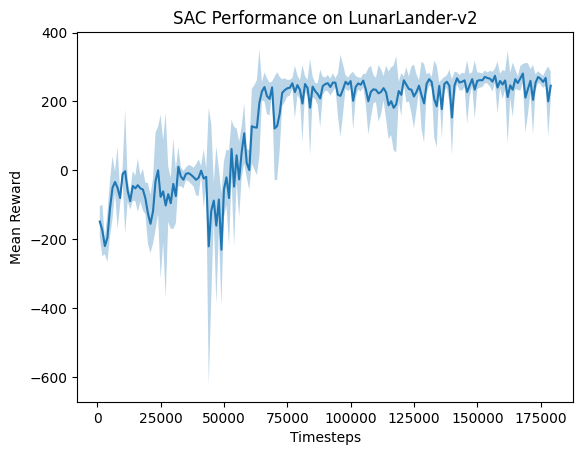

In [ ]:
# Load the evaluations.npz file
data = numpy.load('./logs/evaluations.npz')

# Extract the relevant data
timesteps = data['timesteps']
results = data['results']

# Calculate the mean and standard deviation of the results
mean_results = numpy.mean(results, axis=1)
std_results = numpy.std(results, axis=1)

# Plot the results
matplotlib.pyplot.figure()
matplotlib.pyplot.plot(timesteps, mean_results)
matplotlib.pyplot.fill_between(timesteps,
                               mean_results - std_results,
                               mean_results + std_results,
                               alpha=0.3)

matplotlib.pyplot.xlabel('Timesteps')
matplotlib.pyplot.ylabel('Mean Reward')
matplotlib.pyplot.title('SAC Performance on LunarLander-v2')
matplotlib.pyplot.show()